In [ ]:
#The purpose of this file is to try and introduce population statistics via the census data in order to analyze crime rates per capita
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt

In [201]:
main_df = pd.read_csv("census_data.csv",index_col=False)
main_df['Fee'] = pd.to_numeric(main_df['CensusYear'])
main_df = main_df.loc[main_df["Sex"]== "Both sexes"]
main_df = main_df.drop(["Statistic Label","Sex","UNIT","Fee"],axis=1)
main_df = main_df.loc[main_df["County"]!= "State"]
main_df = main_df.loc[main_df["CensusYear"]>= 2001]
main_df


,CensusYear,County,VALUE
1704,2002,Carlow,46014
1707,2002,Dublin,1122821
1710,2002,Kildare,163944
1713,2002,Kilkenny,80339
1716,2002,Laois,58774
...,...,...,...
2091,2022,Roscommon,70259
2094,2022,Sligo,70198
2097,2022,Cavan,81704
2100,2022,Donegal,167084


In [202]:
unique_years = main_df["CensusYear"].unique().tolist() #obtaining census years 
unique_years

[2002, 2006, 2011, 2016, 2022]

In [203]:
gardai_divisions = ['Cavan-Monaghan Garda Division',
 'Clare Garda Division',
 'Cork City Garda Division',
 'Cork North Garda Division',
 'Cork West Garda Division',
 'D.M.R. Eastern Garda Division',
 'D.M.R. North Central Garda Division',
 'D.M.R. Northern Garda Division',
 'D.M.R. South Central Garda Division',
 'D.M.R. Southern Garda Division',
 'D.M.R. Western Garda Division',
 'Donegal Garda Division',
 'Galway Garda Division',
 'Kerry Garda Division',
 'Kildare Garda Division',
 'Kilkenny-Carlow Garda Division',
 'Laois-Offaly Garda Division',
 'Limerick Garda Division',
 'Louth Garda Division',
 'Mayo Garda Division',
 'Meath Garda Division',
 'Roscommon-Longford Garda Division',
 'Sligo-Leitrim Garda Division',
 'Tipperary Garda Division',
 'Waterford Garda Division',
 'Westmeath Garda Division',
 'Wexford Garda Division',
 'Wicklow Garda Division']

In [204]:

def closest(lst, K):
    #using heapq.nsmallest() to find the closest census in our list for a given year 
    return heapq.nsmallest(1, lst, key=lambda x: abs(x-K))[0]

In [205]:
#We need to find the closest available population for each of districts per our census for a given year
cleaned_df = pd.read_csv("cleaned_df.csv")
cleaned_df


,Year,Garda Division,Type of Offence,VALUE,Population
0,2003,Cavan-Monaghan Garda Division,"Attempts/threats to murder, assaults, harassme...",596.0,109139
1,2003,Cavan-Monaghan Garda Division,Burglary and related offences,480.0,109139
2,2003,Cavan-Monaghan Garda Division,Controlled drug offences,191.0,109139
3,2003,Cavan-Monaghan Garda Division,Damage to property and to the environment off...,651.0,109139
4,2003,Cavan-Monaghan Garda Division,Dangerous or negligent acts,866.0,109139
...,...,...,...,...,...
10299,2025,Wicklow Garda Division,Road and traffic offences,688.0,155851
10300,2025,Wicklow Garda Division,"Robbery, extortion and hijacking offences",24.0,155851
10301,2025,Wicklow Garda Division,Sexual offences,64.0,155851
10302,2025,Wicklow Garda Division,Theft and related offences,1349.0,155851


In [206]:
def obtain_population(year,garda_division):
    county = garda_division.split(" ")[0]
    year = closest(unique_years, year)
    if "D.M.R" in county:
        return main_df.loc[
        (main_df["CensusYear"] == year) &
        (main_df["County"] == "Dublin"),
        "VALUE"
        ].item()
    if "-" in county:
        first,second = county.split("-")
        value_1 = main_df.loc[
        (main_df["CensusYear"] == year) &
        (main_df["County"] == first),
        "VALUE"
        ].item()
        value_2 = main_df.loc[
        (main_df["CensusYear"] == year) &
        (main_df["County"] == second),
        "VALUE"
        ].item()
        value = value_1 + value_2
    else:
        value = main_df.loc[
            (main_df["CensusYear"] == year) &
            (main_df["County"] == county),
            "VALUE"
        ].item()

    return value
        

In [207]:
inf_list = []
for i, row in cleaned_df.iterrows():
    pop = obtain_population(row["Year"],row["Garda Division"])
    inf_list.append(pop)


In [208]:
cleaned_df["Population"] = inf_list

In [209]:
cleaned_df.to_csv("cleaned_df.csv", index=False)

In [210]:
cleaned_df

,Year,Garda Division,Type of Offence,VALUE,Population
0,2003,Cavan-Monaghan Garda Division,"Attempts/threats to murder, assaults, harassme...",596.0,109139
1,2003,Cavan-Monaghan Garda Division,Burglary and related offences,480.0,109139
2,2003,Cavan-Monaghan Garda Division,Controlled drug offences,191.0,109139
3,2003,Cavan-Monaghan Garda Division,Damage to property and to the environment off...,651.0,109139
4,2003,Cavan-Monaghan Garda Division,Dangerous or negligent acts,866.0,109139
...,...,...,...,...,...
10299,2025,Wicklow Garda Division,Road and traffic offences,688.0,155851
10300,2025,Wicklow Garda Division,"Robbery, extortion and hijacking offences",24.0,155851
10301,2025,Wicklow Garda Division,Sexual offences,64.0,155851
10302,2025,Wicklow Garda Division,Theft and related offences,1349.0,155851


In [211]:
cleaned_df["Rate_per_100k"] = (cleaned_df["VALUE"] / cleaned_df["Population"]) * 100_000


In [212]:
cleaned_df

,Year,Garda Division,Type of Offence,VALUE,Population,Rate_per_100k
0,2003,Cavan-Monaghan Garda Division,"Attempts/threats to murder, assaults, harassme...",596.0,109139,546.092598
1,2003,Cavan-Monaghan Garda Division,Burglary and related offences,480.0,109139,439.806119
2,2003,Cavan-Monaghan Garda Division,Controlled drug offences,191.0,109139,175.006185
3,2003,Cavan-Monaghan Garda Division,Damage to property and to the environment off...,651.0,109139,596.487049
4,2003,Cavan-Monaghan Garda Division,Dangerous or negligent acts,866.0,109139,793.483539
...,...,...,...,...,...,...
10299,2025,Wicklow Garda Division,Road and traffic offences,688.0,155851,441.447280
10300,2025,Wicklow Garda Division,"Robbery, extortion and hijacking offences",24.0,155851,15.399324
10301,2025,Wicklow Garda Division,Sexual offences,64.0,155851,41.064863
10302,2025,Wicklow Garda Division,Theft and related offences,1349.0,155851,865.570320


In [213]:
crimes = cleaned_df["Type of Offence"].unique()


In [214]:
dfs = [cleaned_df[cleaned_df["Garda Division"]==i] for i in cleaned_df["Garda Division"].unique()]



In [215]:
dfs[0]

,Year,Garda Division,Type of Offence,VALUE,Population,Rate_per_100k
0,2003,Cavan-Monaghan Garda Division,"Attempts/threats to murder, assaults, harassme...",596.0,109139,546.092598
1,2003,Cavan-Monaghan Garda Division,Burglary and related offences,480.0,109139,439.806119
2,2003,Cavan-Monaghan Garda Division,Controlled drug offences,191.0,109139,175.006185
3,2003,Cavan-Monaghan Garda Division,Damage to property and to the environment off...,651.0,109139,596.487049
4,2003,Cavan-Monaghan Garda Division,Dangerous or negligent acts,866.0,109139,793.483539
...,...,...,...,...,...,...
9867,2025,Cavan-Monaghan Garda Division,Road and traffic offences,752.0,146992,511.592468
9868,2025,Cavan-Monaghan Garda Division,"Robbery, extortion and hijacking offences",24.0,146992,16.327419
9869,2025,Cavan-Monaghan Garda Division,Sexual offences,72.0,146992,48.982258
9870,2025,Cavan-Monaghan Garda Division,Theft and related offences,602.0,146992,409.546098


In [216]:
dfs[0]["Garda Division"][0]

'Cavan-Monaghan Garda Division'

In [217]:
## Make a figure of 16 graphs, each containing information as to crime in each category over the years
county_crime_information = {}

for df in dfs:
    crimes_since_2003 = []
    for crime in crimes:
        y = df[df["Type of Offence"] == f"{crime}"]["Rate_per_100k"]
        x =  df[df["Type of Offence"] == f"{crime}"]["Year"]
        temp = [x,y]
        crimes_since_2003.append(temp)
    county_crime_information[df["Garda Division"].iloc[0]] = crimes_since_2003



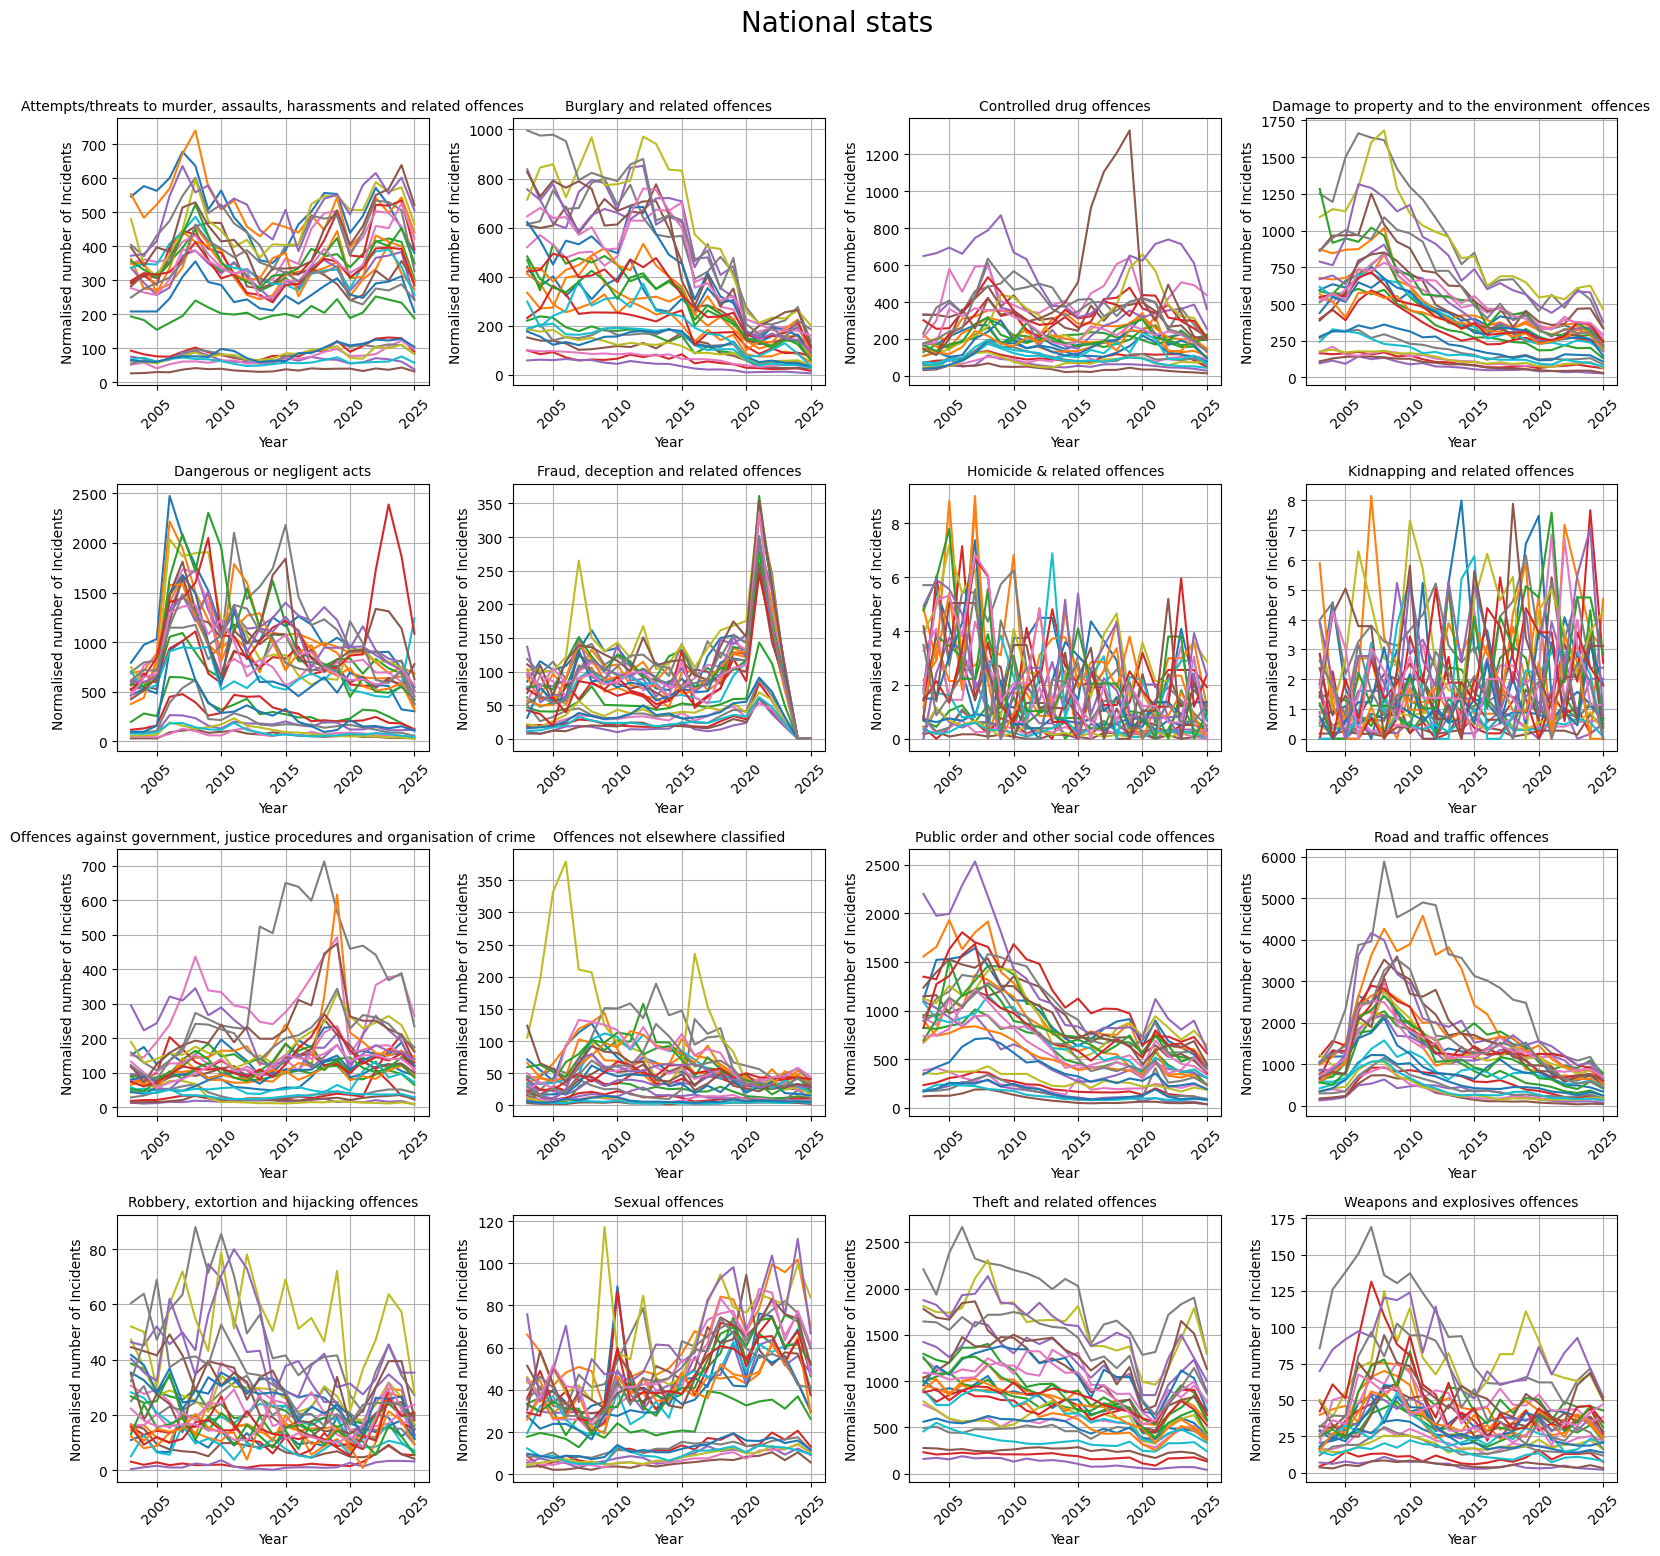

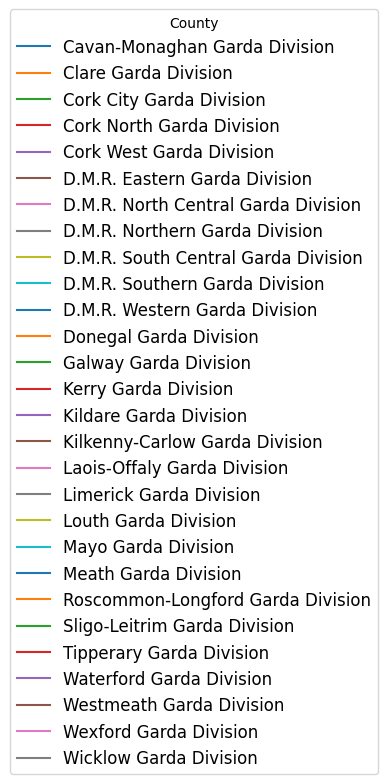

In [218]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
fig.suptitle("National stats", fontsize=20, y=0.97)

for county in county_crime_information:
    for i, crime in enumerate(county_crime_information[county]):
        row = i // 4
        col = i % 4
        ax[row, col].plot(crime[0], crime[1], linestyle='-')  # no label
        ax[row, col].set_title(f"{crimes[i]}", fontsize=10)
        ax[row, col].set_xlabel("Year")
        ax[row, col].set_ylabel("Normalised number of Incidents")
        ax[row, col].grid(True)
        ax[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("national_stats_normalised.png")
plt.show()


fig_legend = plt.figure(figsize=(4,6)) # creating a second figure to store our legend
ax_leg = fig_legend.add_subplot(111) # first figure, one col,one row

handles = [] # handle =plotted object
for county in county_crime_information:
    line, = ax_leg.plot([], [], label=county) #creating an empty plot with some empty data
    handles.append(line)

ax_leg.legend(handles=handles, loc='center', fontsize=12, title="County") # creating our legend
ax_leg.axis('off')  # disabling our axis
plt.savefig("legend_only_normalised.png", bbox_inches='tight')
plt.show()


In [219]:
cleaned_df_2025 = cleaned_df[cleaned_df["Year"] == 2025]

for crime in crimes:
    subset = cleaned_df_2025[cleaned_df_2025["Type of Offence"] == crime]

    if subset.empty or subset["Rate_per_100k"].isna().all():
        print(f"No usable data for {crime}")
        continue

    idx = subset["Rate_per_100k"].idxmax()
    county = subset.loc[idx, "Garda Division"]
    figure = subset.loc[idx, "Rate_per_100k"]

    print(f"\n{crime}")
    print(f"Highest: {county} → {figure:.2f} per 100k")

    top3 = subset.sort_values("Rate_per_100k", ascending=False).head(3)
    print("Top 3:")
    print(top3[["Garda Division", "Rate_per_100k"]].to_string(index=False))



Attempts/threats to murder, assaults, harassments and related offences
Highest: Westmeath Garda Division → 521.72 per 100k
Top 3:
          Garda Division  Rate_per_100k
Westmeath Garda Division     521.715634
Waterford Garda Division     505.641356
    Louth Garda Division     465.988561

Burglary and related offences
Highest: Louth Garda Division → 201.86 per 100k
Top 3:
        Garda Division  Rate_per_100k
  Louth Garda Division     201.856796
Wicklow Garda Division     185.433523
Wexford Garda Division     159.835040

Controlled drug offences
Highest: Laois-Offaly Garda Division → 436.50 per 100k
Top 3:
             Garda Division  Rate_per_100k
Laois-Offaly Garda Division     436.504082
   Waterford Garda Division     361.172397
     Kildare Garda Division     254.263966

Damage to property and to the environment  offences
Highest: Louth Garda Division → 462.41 per 100k
Top 3:
          Garda Division  Rate_per_100k
    Louth Garda Division     462.409540
Waterford Garda Divisio